# **Capstone Project 2 - US Trending Youtube Video Statistics Analysis**

## **Background**

YouTube merupakan salah satu platform terpopuler di dunia untuk menonton dan berbagi video secara gratis maupun premium berbayar. Tak hanya itu, kini YouTube telah memperluas produknya untuk mendukung para YouTube Content Creator agar semakin berkembang, diantaranya seperti Youtube Ads, Youtube Music, Youtube Shorts, Youtube Kids, Youtube Trends, Youtube Live, Super Chat, Merchandise, Channel Membership, hingga Youtube BrandConnect. Oleh karena itu, YouTube telah dipercaya oleh banyak Content Creator sebagai sumber pendapatan mereka selama 16 tahun terakhir.

## **Problem Statement**

Seorang Client dari United States ingin memulai karir baru sebagai YouTube Content Creator. Client tersebut memiliki harapan channel YouTubenya dapat menjangkau, menginspirasi dan menghibur banyak orang, dimonetisasi oleh YouTube, terus berkembang dan bertahan dalam jangka waktu yang panjang. Target penonton utama Client adalah penduduk di negaranya sendiri.

Untuk memecahkan permasalahan di atas, kita perlu mengetahui terlebih dahulu content Youtube seperti apa yang paling populer di US, bagaimana algoritma trending YouTube bekerja, dan bagaimana cara terbaik untuk memulai dan mengembangkan channel YouTube bagi Pemula. 

Salah satu cara yang baik untuk memperkenalkan Channel Youtube yang baru adalah dengan memanfaatkan Youtube Trends. Ketika video dari suatu channel trending, maka channel dan video-video dari channel tersebut juga akan semakin mudah dijangkau oleh lebih banyak pengguna YouTube. 

Berdasarkan [Youtube Helps Center](https://support.google.com/youtube/answer/7239739?hl=en), YouTube dapat menampilkan video pada laman Trending dengan beberapa pertimbangan seperti:
- Seberapa cepat video menghasilkan views (Temperature)
- Dari mana views berasal (untuk menentukan lokasi Trending berdasarkan negara)
- Performa video  lebih baik dibandingkan rata2 performa video lainnya dari channel yang sama 
- Video bukan clickbait dan video sensasi

## **Data Understanding**

#### **Data Extracting**

Permasalahan di atas akan dianalisa menggunakan dataset **US Trending Youtube Video Statistics**. Dataset ini berisi rekam jejak harian video berdasarkan youtube trending di US. Dataset dapat diakses [di sini.](https://www.kaggle.com/datasets/datasnaek/youtube-new)

In [1409]:
# Import Library
import numpy as np
import pandas as pd
from datetime import datetime

In [1410]:
# Load Dataset CSV
youtube_US = pd.read_csv('USvideos.csv')
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"


In [1411]:
# Load Dataset JSON
category_US = pd.read_json('US_category_id.json')
category_US.head(2)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"


Keterangan Kolom Dataset :
- video_id : ID unik dari tiap video
- trending_date : tahun-bulan-tanggal video trending 
- title : Judul video
- channel_title : Nama channel creator
- category_id : ID unik dari kategori video
- publish_time : Waktu video dipublish
- tags : Tags pada video
- views : Jumlah tayangan video (per tanggal setelah video dipublish)
- likes : Jumlah disukai video (per tanggal setelah video dipublish)
- dislikes: Jumlah tidak disukai video (per tanggal setelah video dipublish)
- comment_count : Jumlah komentar video (per tanggal setelah video dipublish)
- thumbnail_link : Link foto thumbnail
- comments_disabled : Video yang komentarnya dinon-aktifkan
- ratings_disabled : Video yang ratingnya dinon-aktifkan
- video_error_or_removed : Video yang error / removed 
- description : Deskripsi video

#### **Information from Dataset**

Mari kita pahami dataset terlebih dahulu untuk mengetahui strategi preparation seperti apa yang harus kita lakukan dan menentukan hal apa saja yang dapat dianalisis melalui dataset ini untuk menyelesaikan permasalahan.

##### **1) DataFrame youtube_US**

In [1037]:
# Data Summary
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [1038]:
# Check Data Unique dari category_id
print('Kategori ID :', youtube_US['category_id'].unique())

Kategori ID : [22 24 23 28  1 25 17 10 15 27 26  2 19 20 29 43]


- Dataset ini memiliki 40949 baris data dan 16 kolom/variabel dengan 3 jenis tipe data :
    - 5 Variabel Numerik : category_id, views, likes, dislikes, comment_count
    - 8 Variabel Categorical/Object : video_id, trending_date, title, channel_title, publish_time, tags, thumbnail_link, description
    - 3 Variabel Boolean : comments_disabled, ratings_disabled, video_error_or_removed
- Tipe data pada kolom trending_date dan publish_time tidak sesuai / harus dirubah ke datetime untuk mempermudah proses analisis
- Dataset hanya memiliki category ID, sehingga diperlukan kolom baru berisi jenis kategori. File US_category_id.json akan diperlukan untuk membuat kolom category.
- Masih terdapat missing value pada dataset

In [1039]:
# Numerical Description Analysis
youtube_US.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


- Jumlah minimum views (549), likes (0), dislikes (0), comment_count (0) sangat kecil / sangat tidak mungkin untuk trending. Hal ini menandakan bahwa dataset ini berisi list video yang trending dan tidak trending di US, dan kita perlu mengkategorikan datanya terlebih dahulu menjadi video yang trending dan tidak trending.

In [1040]:
# Categorical Description Analysis
youtube_US.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/
freq,30,200,30,203,50,1535,30,58


- Jumlah data unik pada kolom video_id lebih banyak daripada trending_date -> Terdapat beberapa video yang trending pada hari yang sama / terdapat video yang memiliki waktu trending lebih dari 1 hari 
- Jumlah data unik pada kolom video_id lebih banyak daripada channel_title -> Terdapat channel yang mengupload lebih dari 1 video
- Video yang tidak memiliki tags dilambangkan dengan '[none]'
- Jumlah data unik pada kolom title lebih banyak daripada video_id -> Terdapat typo/inconsisten/duplicate pada kolom title, sehingga 1 video memiliki lebih dari 1 judul. Hal ini harus diperbaiki dengan memfilter judul yang sesuai.

##### **2) DataFrame category_US**

In [1041]:
# Data Summary
category_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    32 non-null     object
 1   etag    32 non-null     object
 2   items   32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [1042]:
# Check Unique Value 
pd.set_option('display.max_colwidth', None)
category_US.describe()

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
freq,32,32,1


- Kolom kind dan etag hanya memiliki 1 data unik dan tidak memiliki informasi penting yang dapat menjawab permasalahan
- kolom items berisi 32 data unik dengan informasi ID berupa category ID dan title berupa jenis category, sehingga data pada key title akan diekstrak dan digabung ke dataset csv

#### **Questions based on Dataset**

Berikut hal-hal yang perlu dianalisis untuk menyelesaikan permasalahan : 

**Content Youtube seperti apa yang paling populer di US?**
- Kategori apa yang paling diminati di US?
- Channel apa yang paling popular di US?

**Bagaimana algoritma trending YouTube bekerja?**
- Bagaimana perbedaan video trending dan tidak trending?
- Bagaimana pengaruh views, comment, likes, dislikes, waktu publish, jumlah tags, comment_disabled, rating_disabled, dan video_error_or_removed terhadap trending? Apa faktor yang paling mempengaruhi trending?
- Bagaimana pengaruh views terhadap comment, likes dan dislikes di suatu video?
- Berapa rata2 waktu yang dibutuhkan oleh video untuk trending?

## **Data Preparation**

#### **1) Drop and Filtering Data**

##### **thumbnail_link**

Kolom thumbnail_link berisikan link ke foto thumbnail dari video yang diupload oleh youtube creator. Semakin menarik foto thumbnail suatu video, tentu saja akan lebih menarik banyak penonton. Penentuan menarik atau tidaknya suatu thumbnail sangat bergantung dengan preferensi tiap orang, sehingga jika ingin dilanjutkan ke analisis masih membutuhkan data tambahan yang berisi informasi preferensi thumbnail youtube yang paling banyak diminati orang-orang di US dan membutuhkan model yang dapat mengkategorikan foto thumbnail menarik/kurang menarik/tidak menarik. Oleh karena itu, kolom thumbnail_link akan dihapus.

In [1412]:
# Drop thumbnail_link
youtube_US.drop(['thumbnail_link'], axis=1, inplace=True)
youtube_US.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.


In [1343]:
# Kolom thumbnail_link telah berhasil dihapus
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  comments_disabled       40949 non-null  bool  
 12  ratings_disabled        40949 non-null  bool  
 13  video_error_or_removed  40949 non-null  bool  
 14  description             40379 non-null  object
dtypes:

##### **title**

Jumlah data unik pada kolom title lebih banyak daripada video_id. Hal ini mungkin terjadi akibat adanya typo/inconsisten/duplicate pada kolom title, sehingga 1 ID video memiliki judul lebih dari 1. Mari kita samakan jumlah data unik dari kolom title dan video_id.

In [1413]:
# Check data yang memiliki faulty
title_ID = youtube_US.groupby(['video_id'])['title'].apply(set)
filter_title_ID = title_ID[title_ID.map(len) > 1].index
faulty_title_ID = youtube_US[youtube_US.set_index(['video_id']).index.isin(filter_title_ID)]
faulty_title_ID.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast"
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective present Pets are Awesome!,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""youtube""|""hd""|""compilation""|""humans""|""amazing people""|""incredible""|""gopro""|""gopro hero""|""extreme sports""|""adventure travel""|""people are awesome videos""|""PAA""|""the pet collective""|""pet collective TV""|""I love my pets""|""awesome pets""|""pets are awesome""|""Adventure Pup""|""Adventure Dogs""|""Good Doggo""|""Adventure Cats""|""Surfing""|""snowboarding""|""skiing""|""wakeboarding""",69844,3417,33,160,False,False,False,"Pets are Awesome! This is for all the animal lovers out there. Pets aren't just animals, they're family! They make the best of best friends, and are pretty rad adventure buddies too. Did you have a favorite? Let us know in the comments! \n\nSubscribe to The Pet Collective! \nhttps://www.youtube.com/ThePetCollective\n\n➤ WATCH NEXT\n\n⇢ Best of the Week!\nhttps://www.youtube.com/watch?v=z9NFbXNghuE\n\n\n➤ MUSIC\nTitle: Some Kind Of Magic (feat. MYZICA) by LVTHER\niTunes Download Link: https://itunes.apple.com/us/album/some-kind-magic-feat.-myzica/id1095080701\nListen on Spotify: https://open.spotify.com/album/7fyHjUeUewEqqvTol9QQx9\nVideo Link: https://www.youtube.com/watch?v=SzWk_I304Sg\n\n\n➤ ORIGINAL VIDEOS\nhttps://goo.gl/xP69SA\nhttps://goo.gl/iPkWa9\nhttps://goo.gl/nSi3cb\nhttps://goo.gl/384Nrq\nhttps://goo.gl/XckbCJ\nhttps://goo.gl/71GvLa\nhttps://goo.gl/kvUbQv\nhttps://goo.gl/r5Kzr9\nhttps://goo.gl/gyK6pc\nhttps://goo.gl/bZa42g\nhttps://goo.gl/PqHR2E\nhttps://goo.gl/gWhv3E\nhttps://goo.gl/1nmW8A\nhttps://goo.gl/nL7tZp\nhttps://goo.gl/chJ6om\nhttps://goo.gl/F7myih\nhttps://goo.gl/QPSy6L\nhttps://goo.gl/tZyzLm\nhttps://goo.gl/svtLJj\nhttps://goo.gl/svtLJj\nhttps://goo.gl/tXQS3V\nhttps://goo.gl/FcmueK\nhttps://goo.gl/3nmZCr\nhttps://goo.gl/pjnAm2\nhttps://goo.gl/9y9Cy9\nhttps://goo.gl/jHE597\nhttps://goo.gl/qr3zxP\nhttps://goo.gl/XSnYXX\nhttps://goo.gl/5Kpmvm\nhttps://goo.gl/5nvFjV\nhttps://goo.gl/juLFcN\n\n\n➤ Subscribe: http://bit.ly/PAASubscribe\n➤ Submit Videos: http://bit.ly/SubmitPAA\n\n\nFacebook: http://bit.ly/fPAA\nInstagram: http://bit.ly/InstaPAA\nTwitter: http://bit.ly/tweetPAA\n\nFor business and licensing inquiries: contact@peopleareawesome.com\n\nPEOPLE ARE AWESOME is the number one destinatio

In [1414]:
print('jumlah faulty:', len(faulty_title_ID))

jumlah faulty: 928


In [1346]:
faulty_title_ID.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,description
count,928,928,928,928,928,928,920
unique,109,205,221,100,112,142,163
top,MAjY8mCTXWk,18.18.04,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV",杰威爾音樂 JVR Music,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""袁詠琳""|""cindy""|""yen""|""官方""|""高清""|""不愛我就拉倒""|""繁體""|""浩克""|""彈頭""",Calum’s debut album ‘Only Human’ feat. “You Are The Reason” & “Dancing On My Own” out now! iTunes: https://calumscott.lnk.to/onlyhumanYD/iTunes Listen on Apple Music: https://calumscott.lnk.to/onlyhumanYD/AppleMusic Stream/Add on Spotify: https://calumscott.lnk.to/onlyhumanYD/Spotify Get it on Amazon (CD/MP3/Prime): https://calumscott.lnk.to/onlyhumanYD/Amazon Get it on Google Play: https://calumscott.lnk.to/onlyhumanYD/Google-Play Watch Calum's You Are The Reason (Official Video): https://calumscott.lnk.to/yatrvidYD Director: Ozzie PullinProducer: Alasdair MitchellDirector of Photography: Adric WatsonEditor: Chris RoebuckProduction Company: PartizanExec Producer: Claire StubbsColour: Simon Bourne at Framestore Follow Calum Scott - Facebook: https://calumscott.lnk.to/facebookYD Twitter: https://calumscott.lnk.to/twitterYD @CalumScott Instagram: https://calumscott.lnk.to/instagramYD @CalumScott Spotify: https://calumscott.lnk.to/spotifyYD Soundcloud: https://calumscott.lnk.to/soundcloudYD Official Site: http://www.calumscott.comMusic video by Calum Scott performing What I Miss Most. © 2018 Capitol Recordshttp://vevo.ly/jyfwBz
freq,29,12,28,29,29,29,27


Terdapat total 928 faulty data. Ternyata benar, faulty disebabkan oleh beberapa ID video memiliki judul lebih dari 1, yang dapat dikarenakan oleh typo, inconsisten penulisan, dan duplikat. 

Kita coba ambil contoh pada ID video yang memiliki paling banyak faulty, yaitu MAjY8mCTXWk dengan judul sebanyak 29. Terlihat diantaranya terdapat 28 judul duplikat dan 1 judul dengan penulisan sangat berbeda / inconsisten :

In [1415]:
faulty_title_ID[faulty_title_ID['video_id']=='MAjY8mCTXWk'][['video_id','title']]

,video_id,title
34753,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
34902,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
34965,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
35178,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
35393,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
35597,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
35800,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
36032,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
36242,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"
36450,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV"


Contoh lainnya adalah pada video ogYum4kWXgk yang memiliki 5 judul berbeda, yaitu 4 judul duplikat dan 1 judul typo dengan spasi di karakter pertama :

In [1050]:
faulty_title_ID[faulty_title_ID['video_id']=='ogYum4kWXgk'][['video_id','title']]

,video_id,title
46,ogYum4kWXgk,People are Awesome & The Pet Collective present Pets are Awesome!
272,ogYum4kWXgk,People Are Awesome & The Pet Collective present: Pets are Awesome!
490,ogYum4kWXgk,People Are Awesome & The Pet Collective present: Pets are Awesome!
743,ogYum4kWXgk,People Are Awesome & The Pet Collective present: Pets are Awesome!
982,ogYum4kWXgk,People Are Awesome & The Pet Collective present: Pets are Awesome!


Permasalahan faulty data akan diselesaikan dengan memilih title yang paling sering muncul untuk 1 jenis ID video. Misalkan untuk kasus di atas, ID ogYum4kWXgk hanya akan memiliki 1 judul saja yaitu : People Are Awesome & The Pet Collective present: Pets are Awesome! , sementara itu row data lainnya akan dihapus.

In [1416]:
# Manage faulty data, kini jumlah data unik video_id dan title telah sama (6343)
id = []
title = []
id_mode = youtube_US.groupby('title')['video_id'].transform(lambda x: x.mode()[0])
title_mode = youtube_US.groupby('video_id')['title'].transform(lambda x: x.mode()[0])

for x in range(len(id_mode)):
    title.append(youtube_US['title'].loc[x].lower())
    id.append(id_mode.loc[x])

youtube_US['video_id'] = id
youtube_US['title']= title_mode
youtube_US.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,description
count,40949,40949,40949,40949,40949,40949,40379
unique,6343,205,6343,2207,6269,6055,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/
freq,30,200,30,203,50,1535,58


#### **2) Data Formatting** 

In [1417]:
youtube_US[['publish_time','trending_date']].head(2)

,publish_time,trending_date
0,2017-11-13T17:13:01.000Z,17.14.11
1,2017-11-13T07:30:00.000Z,17.14.11


##### **publish_time**
Tipe data publish_time masih berbentuk object sehingga perlu diubah ke datetime

In [1418]:
# Change publish_time data type to Datetime 
youtube_US['publish_time'] = pd.to_datetime(youtube_US['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

# Remake publish_time to publish & drop publish_time
youtube_US['publish'] = youtube_US['publish_time'] 
youtube_US.drop(['publish_time'], axis=1, inplace=True)
youtube_US[['publish']].head(2)

,publish
0,2017-11-13 17:13:01
1,2017-11-13 07:30:00


In [1419]:
# Tipe data publish telah berhasil diubah menjadi datetime64[ns]
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  object        
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

##### **trending_date**

- Data pada variabel trending_date memiliki format penulisan Year-Date-Month, dimana seharusnya adalah Year-Month-Date, sehingga harus diperbaiki penulisannya.
- Tipe data trending_date masih berbentuk object sehingga perlu diubah ke datetime

In [1420]:
youtube_US['trending_date'] = pd.to_datetime(youtube_US['trending_date'].astype(str),format='%y.%d.%m')
youtube_US[['trending_date']].head(2)

,trending_date
0,2017-11-14
1,2017-11-14


In [1421]:
# Tipe data trending_date sudah berhasil diubah menjadi datetime64[ns]
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

#### **3) Handling Missing values**

Sebelumnya sudah dicek, bahwa terdapat data [None] pada kolom tags yang berarti video tidak memiliki tags. [None] akan diubah ke NaN. Selanjutnya, data NaN pada variabel description dan tags akan diisi dengan 'None' string, yang berarti video tidak mencantumkan deskripsi atau tags. Pelambangan None pada missing value pada kedua kolom ini dilakukan untuk membandingkan pengaruh pencantuman keduanya terhadap trending.

In [1422]:
# Change [None] to NaN
youtube_US['tags'] = np.where(youtube_US['tags']=='[none]', np.nan, youtube_US['tags'])

In [1423]:
# Calculate Null
data_null = youtube_US.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
# Calculate Percentage Null
data_null['null percentage'] = data_null['null count'].apply(lambda x: x/(len(data_null)*100))
data_null

,variable,null count,null percentage
0,video_id,0,0.000000
1,trending_date,0,0.000000
2,title,0,0.000000
3,channel_title,0,0.000000
4,category_id,0,0.000000
5,tags,1535,1.023333
6,views,0,0.000000
7,likes,0,0.000000
8,dislikes,0,0.000000
9,comment_count,0,0.000000


##### **tags**

In [1424]:
# Handle Tags Null Values
youtube_US['tags'].fillna(value = 'None', inplace=True)

##### **description**

In [1425]:
# Handle Description Null Values
youtube_US['description'].fillna(value = 'None', inplace=True)

In [1357]:
# Recheck Null
data_null = youtube_US.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
data_null['null percentage'] = data_null['null count'].apply(lambda x: x/(len(data_null)*100))
data_null

,variable,null count,null percentage
0,video_id,0,0.0
1,trending_date,0,0.0
2,title,0,0.0
3,channel_title,0,0.0
4,category_id,0,0.0
5,tags,0,0.0
6,views,0,0.0
7,likes,0,0.0
8,dislikes,0,0.0
9,comment_count,0,0.0


#### **4) Add New Column** 

##### **publish_date** : year-month-date video dipublish

In [1426]:
youtube_US['publish_date'] = pd.to_datetime(youtube_US['publish']).dt.date
youtube_US['publish_date'] = pd.to_datetime(youtube_US['publish_date'])
youtube_US[['publish_date']].head(2)

,publish_date
0,2017-11-13
1,2017-11-13


In [1427]:
# Kolom publish_date dengan tipe data datetime64[ns] telah berhasil dibuat
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

##### **publish_day** : Hari video dipublish

In [1428]:
def day_name(date):
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    day = date.weekday()
    return days[day]
youtube_US['publish_day'] = youtube_US['publish_date'].apply(day_name)
youtube_US[['publish_day']].head(2)

,publish_day
0,Monday
1,Monday


In [1429]:
# Kolom publish_day dengan tipe data object telah berhasil dibuat
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

##### **publish_hour** : Jam video dipublish

In [1430]:
youtube_US['publish_hour'] = pd.to_datetime(youtube_US['publish']).dt.hour
youtube_US[['publish_hour']].head(2)

,publish_hour
0,17
1,7


In [1431]:
# Kolom publish_hour dengan tipe data int64 telah berhasil dibuat
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

##### **number_of_tags** : Jumlah tags yang dicantumkan dalam suatu video

In [1432]:
youtube_US['tag'] = youtube_US['tags'].str.split('|')
youtube_US[['tag']].head()

,tag
0,[SHANtell martin]
1,"[last week tonight trump presidency, ""last week tonight donald trump"", ""john oliver trump"", ""donald trump""]"
2,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""bach"", ""racist"", ""superman"", ""love"", ""rudy mancuso poo bear black white official music video"", ""iphone x by pineapple"", ""lelepons"", ""hannahstocking"", ""rudymancuso"", ""inanna"", ""anwar"", ""sarkis"", ""shots"", ""shotsstudios"", ""alesso"", ""anitta"", ""brazil"", ""Getting My Driver's License , Lele Pons""]"
3,"[rhett and link, ""gmm"", ""good mythical morning"", ""rhett and link good mythical morning"", ""good mythical morning rhett and link"", ""mythical morning"", ""Season 12"", ""nickelback lyrics"", ""nickelback lyrics real or fake"", ""nickelback"", ""nickelback songs"", ""nickelback song"", ""rhett link nickelback"", ""gmm nickelback"", ""lyrics (website category)"", ""nickelback (musical group)"", ""rock"", ""music"", ""lyrics"", ""chad kroeger"", ""canada"", ""music (industry)"", ""mythical"", ""gmm challenge"", ""comedy"", ""funny"", ""challenge""]"
4,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare you"", ""idy"", ""rhpc"", ""dares"", ""no truth"", ""comments"", ""comedy"", ""funny"", ""stupid"", ""fail""]"


In [1433]:
# Make dataframe berisi number of tags
df_tag = youtube_US['tag'].str.len().reset_index().rename(columns={'index':'x_tag','tag':'number_of_tag'})
df_tag[['number_of_tag']]

,number_of_tag
0,1
1,4
2,23
3,27
4,14
...,...
40944,14
40945,1
40946,24
40947,22


In [1434]:
# Menggabungkan DataFrame df_tag ke youtube_US 
youtube_US = pd.concat([youtube_US,df_tag], axis=1, join= 'inner')
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,tag,x_tag,number_of_tag
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,[SHANtell martin],0,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,...,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",2017-11-13 07:30:00,2017-11-13,Monday,7,"[last week tonight trump presidency, ""last week tonight donald trump"", ""john oliver trump"", ""donald trump""]",1,4


In [1435]:
# drop kolom tag dan x_tag
youtube_US.drop(['tag'], axis=1, inplace=True)
youtube_US.drop(['x_tag'], axis=1, inplace=True)
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",2017-11-13 07:30:00,2017-11-13,Monday,7,4


In [1436]:
# Kolom number_of_tag dengan tipe data int64 telah berhasil dibuat
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

##### **category**

Kolom 'category' akan diisi dengan jenis kategori berdasarkan data pada kolom items (title) pada dataset JSON.

In [1437]:
category_US.head(2)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"


In [1438]:
# Make Youtube Category Dataframe
id = []
category = []
for x in category_US.loc[:,'items']:
    id.append(x['id'])
    category.append(x['snippet']['title'])

youtube_category = pd.DataFrame({'category_id': id,'category': category})

Variable category_id pada json masih berupa object. Untuk menggabungkan dataframe youtube_category dengan youtube_US, data category_id harus diubah menjadi integer terlebih dahulu

In [1439]:
# Change category_id data type into integer
youtube_category['category_id'] = youtube_category['category_id'].astype(np.int64)
youtube_category

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [1440]:
# Kini tipe data category_id sudah berbentuk integer 
youtube_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     int64 
 1   category     32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [1441]:
# Joining 2 dataframes
youtube_US = pd.merge(youtube_US, youtube_category, how='inner', left_on='category_id', right_on='category_id')
youtube_US.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,2017-04-21 06:47:32,2017-04-21,Friday,6,4,People & Blogs
2,STI2fI7sKMo,2017-11-14,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",2017-11-11 15:00:03,2017-11-11,Saturday,15,44,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,False,False,False,"Molly is an god damn amazing human and she challenged me to a blind cake decorating contest! Who do you think won? (YES, I AGREE THAT MOLLY DEFINI

In [1442]:
# Kolom category dengan tipe data object telah berhasil dibuat
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  comments_disabled       40949 non-null  bool          
 11  ratings_disabled        40949 non-null  bool          
 12  video_error_or_removed  40949 non-null  bool  

#### **5) Handling Duplicates**

In [1443]:
# Check number of rows & columns
print('number of rows:', youtube_US.shape[0])
print('number of columns:', youtube_US.shape[1])

number of rows: 40949
number of columns: 20


In [1444]:
print('Jumlah data yang memiliki duplikat:', youtube_US.duplicated().sum())

Jumlah data yang memiliki duplikat: 48


In [1445]:
# Detecting duplicate
duplicate = youtube_US.duplicated()
youtube_US[duplicate].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category
2864,jzLlsbdrwQk,2018-05-15,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,"buzzfeed|""worth it""|""cheap vs. expensive""|""steven lim""|""niki ang""|""alex choi""|""alpacas""|""mini pigs""|""dogs""|""cats""|""nkla""|""BuzzFeedBlue""|""BuzzFeed""|""Worth it pets""|""Worth it Lifestyle""|""lifestyle""|""pets""|""pet""|""price points""|""cheap""|""expensive""|""cute""|""animals""|""lifestyle changes""|""pet lover""|""best friends animal society""|""no kill shelter""|""pet shelter""",3081033,60379,6857,7796,False,False,False,"“Who is Lennox and why is he so special?”Credits: https://www.buzzfeed.com/bfmp/videos/50647Check out more awesome videos at BuzzFeedBlue!https://bit.ly/YTbuzzfeedvideohttps://bit.ly/YTbuzzfeedblue1https://bit.ly/YTbuzzfeedvioletGET MORE BUZZFEED:https://www.buzzfeed.comhttps://www.buzzfeed.com/videoshttps://www.youtube.com/buzzfeedvideohttps://www.youtube.com/asishttps://www.youtube.com/buzzfeedbluehttps://www.youtube.com/buzzfeedviolethttps://www.youtube.com/perolikehttps://www.youtube.com/ladylikeBuzzFeedBlueSports, video games, Unsolved & more epic daily videos!Love BuzzFeed? Get the merch! BUY NOW: https://goo.gl/iquQQDMUSICIntention_MainLicensed via Warner Chappell Production Music Inc.Big Apple Jam_MainLicensed via Warner Chappell Production Music Inc.Hairy Canary_MainLicensed via Warner Chappell Production Music Inc.Licensed via Audio NetworkSFX Provided By AudioBlocks(https://www.audioblocks.com)EXTERNAL CREDITSNancy Chapel-Izerhttps://www.alpacacountryestates.com/+Art Izerhttps://www.alpacacountryestates.com/+Sandra Gianninihttps://www.socalminipigs.com/+Michelle Sathehttps://nkla.org/",2018-05-13 15:00:57,2018-05-13,Sunday,15,28,People & Blogs
2865,UQkBcHLZOqU,2018-05-15,Wearing Fashion Nova Outfits For A Week,Safiya Nygaard,22,"wearing fashion nova outfits for a week|""fashion nova""|""fashion nova outfits""|""cardi b fashion nova""|""cardi b""|""kylie jenner fashion nova""|""kylie jenner""|""nova babe""|""online clothing haul""|""fashion nova haul""|""haul""|""clothing haul""|""safiya fashion nova""|""safiya wish""|""safiya romwe""|""romwe""|""wish""|""safiya nygaard""|""safiya fashion""|""safiya""|""safiya clothes""|""safiya and tyler""",4106029,205285,2180,11217,False,False,False,"I've been seeing this mysterious hashtag #NovaBabe all over instagram, so I decided to investigate and see what all the fuss was about. So I bought seven full outfits from Fashion Nova and wore them for a week to see if they were as good IRL as they looked on instagram. What do you think of my Fashion Nova clothing haul? Did I achieve #NovaBabe status?Don’t forget to click the bell to turn on post notifications!Safiya's Nextbeat: https://nextbeat.co/u/safiyaIG: https://www.instagram.com/safiyany/Twitter: https://twitter.com/safiyajnFacebook: https://www.facebook.com/safnygaard/This video is NOT sponsored!Assistant Editor: Claire WileyMUSICMind The GapTop BananaMagazineCafe LatteTrendsetterTails And Top HatsGypsy SailorHuggys StrutTango FusionSharp DresserJet SetterSadangoOohs And Ahhsvia Audio NetworkSFXvia AudioBlocks",2018-05-11 22:36:56,2018-05-11,Friday,22,22,People & Blogs


In [1446]:
# Drop data duplikat tanpa menghapus data aslinya & reset index dataset
youtube_US.drop_duplicates(keep='first', inplace=True)
youtube_US = youtube_US.reset_index().drop(columns = {'index'})

In [1447]:
# Re-check number of rows & columns
print('number of rows:', youtube_US.shape[0])
print('number of columns:', youtube_US.shape[1])

number of rows: 40901
number of columns: 20


In [1448]:
# Re-check duplicate 
duplicate = youtube_US.duplicated()
youtube_US[duplicate]

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category


#### **6) Handling Outlier**
Menentukan teknik handling outlier pada kasus ini memang tricky karena data outlier pada dataset ini merupakan fenomena yang natural di kehidupan nyata, dimana sebuah video bisa tidak memiliki / memiliki jumlah views, likes, comment dan dislike yang sangat kecil. Serta disisi lain, terdapat video yang memiliki jumlah views, likes, comment dan dislike yang sangat besar. Dalam kata lain, data outlier pada data ini bukan diakibatkan oleh kesalahan input maupun error.

Apabila data outlier dihapuskan, maka akan ada banyak informasi penting yang terhapus. Hal ini dapat terjadi akibat persentase outlier yang terdeteksi terlalu banyak. Contohnya seperti ini :

In [1449]:
# Detect outlier
Q1 = youtube_US['views'].describe()['25%']
Q3 = youtube_US['views'].describe()['75%']
IQR = Q3-Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
outlier = youtube_US[(youtube_US['views'] < lower) | (youtube_US['views'] > upper)][['views']]
print('jumlah outlier:', len(outlier))
print('Persentase outlier dalam data:', len(outlier)/youtube_US.shape[0]*100, '%')

jumlah outlier: 4497
Persentase outlier dalam data: 10.994841201926603 %


In [1450]:
# Show 10 outlier dari data terbesar ke terkecil
outlier.sort_values('views', ascending=False).head(10)

,views
31861,225211923
31815,220490543
31772,217750076
31729,210338856
31684,205643016
31644,200820941
31606,196222618
31564,190950401
31519,184446490
31478,179045286


Jika menghapus data outlier diatas, informasi tentang kategori, channel, tag yang popular di US menjadi tidak sesuai serta analisis lainnya juga menjadi kacau. Oleh karena itu, outlier tidak akan dihapus.

#### **7) Selecting Trending and Not-Trending Videos**

Berdasarkan [Youtube Helps Center](https://support.google.com/youtube/answer/7239739?hl=en), sebuah video dapat trending ditentukan oleh :
- Performa/views video lebih baik dibandingkan average channel views
- Temperature video (Seberapa cepat video menghasilkan views)

##### **avg_channel_views**

In [1451]:
# average views by channel
youtube_US['avg_channel_views'] = youtube_US.groupby('channel_title')['views'].transform('mean')
youtube_US['avg_channel_views'] = youtube_US['avg_channel_views'].astype(np.int64)
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs,2449950
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,2017-04-21 06:47:32,2017-04-21,Friday,6,4,People & Blogs,116099


In [1452]:
# Check apakah average channel views telah sama pada 1 channel dengan ID video berbeda
youtube_US[youtube_US['channel_title']=='CaseyNeistat'].head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs,2449950


In [1453]:
youtube_US[youtube_US['channel_title']=='CaseyNeistat'].tail(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views
3198,1HLMi1s6Tho,2018-06-14,there's something we've been hiding from you.,CaseyNeistat,22,"pregnant|""candice""|""baby""",2410536,136888,3318,17004,...,False,False,go say congrats to the girl - https://www.instagram.com/billy/MUSIC - Natty Reeves - https://soundcloud.com/natty-reeves,2018-06-06 19:35:08,2018-06-06,Wednesday,19,3,People & Blogs,2449950


##### **temperature_video** : Seberapa cepat video menghasilkan views (hour)

In [1454]:
temperature = youtube_US['trending_date']-youtube_US['publish_date']
youtube_US['temperature_video'] = temperature / pd.Timedelta(hours=1)
youtube_US.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views,temperature_video
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs,2449950,24.0


**Get trending video based on avg_channel_views**

Mari kita seleksi video yang memiliki kemungkinan untuk trending berdasarkan tingkat performanya dibandingkan video lain dalam 1 channel terlebih dahulu.

In [1455]:
# 1st Labelling Trending and Non Trending videos
youtube_US['trending_label'] = np.where(youtube_US['views'] > youtube_US['avg_channel_views'], 'Trending', 'Not Trending')
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views,temperature_video,trending_label
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs,2449950,24.0,Not Trending
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,2017-04-21 06:47:32,2017-04-21,Friday,6,4,People & Blogs,116099,4968.0,Not Trending


Kemampuan video untuk trending berbeda-beda pada tiap channel. Semakin popular channel tersebut, maka avg_channel_viewsnya akan semakin besar, sehingga jumlah views yang dibutuhkan untuk trending juga semakin besar. Berdasarkan hasil analisis Stephen, seorang creator YouTube channel Coffee Break,  channel ESPN setidaknya membutuhkan 500.000 views untuk trending dan Philip DeFranco membutuhkan 1.400.000 views untuk trending. Namun pada beberapa video di channel lain masih bisa trending hanya dengan 10.000 views, salah satunya adalah associated press. 
https://www.youtube.com/watch?v=fDqBeXJ8Zx8

Mari kita filter video yang memiliki views < 10.000  namun dianggap trending :

In [1458]:
# Filtering video
x = youtube_US[ (youtube_US['views'] < 10000) & (youtube_US['trending_label'] == 'Trending')].index
youtube_US.drop(x , inplace=True)
youtube_US

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,description,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views,temperature_video,trending_label
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs,2449950,24.0,Not Trending
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,2017-04-21 06:47:32,2017-04-21,Friday,6,4,People & Blogs,116099,4968.0,Not Trending
2,STI2fI7sKMo,2017-11-14,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,...,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",2017-11-11 15:00:03,2017-11-11,Saturday,15,44,People & Blogs,386685,72.0,Not Trending
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,...,"Molly is an god damn amazing human and she challenged me to a blind cake decorating contest! Who do you think won? (YES, I AGRE

#### **8) Final Dataset**

##### **Recheck duplicate**

In [1457]:
# youtube_US
print('Jumlah data yang memiliki duplikat:', youtube_US.duplicated().sum())

Jumlah data yang memiliki duplikat: 0


##### **Recheck Null**

In [1459]:
# youtube_US
data_null = youtube_US.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
data_null['null percentage'] = data_null['null count'].apply(lambda x: x/(len(data_null)*100))
data_null

,variable,null count,null percentage
0,video_id,0,0.0
1,trending_date,0,0.0
2,title,0,0.0
3,channel_title,0,0.0
4,category_id,0,0.0
5,tags,0,0.0
6,views,0,0.0
7,likes,0,0.0
8,dislikes,0,0.0
9,comment_count,0,0.0


##### **Recheck Kesesuaian Tipe Data**

In [1460]:
youtube_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40652 entries, 0 to 40900
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40652 non-null  object        
 1   trending_date           40652 non-null  datetime64[ns]
 2   title                   40652 non-null  object        
 3   channel_title           40652 non-null  object        
 4   category_id             40652 non-null  int64         
 5   tags                    40652 non-null  object        
 6   views                   40652 non-null  int64         
 7   likes                   40652 non-null  int64         
 8   dislikes                40652 non-null  int64         
 9   comment_count           40652 non-null  int64         
 10  comments_disabled       40652 non-null  bool          
 11  ratings_disabled        40652 non-null  bool          
 12  video_error_or_removed  40652 non-null  bool  

##### **Exporting Final Dataset**

In [1643]:
# Save Final dataset
youtube_US.to_csv('cleaned_youtube_US.csv', index=False) 

## **Data Analysis**

In [1488]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### **Perbedaan video trending dan tidak trending**

##### **Jumlah video**

Dari 40652 data video, diperoleh 22409 video trending dan 18243 video tidak trending di US

In [1464]:
youtube_US.groupby('trending_label')[['video_id']].count()

,video_id
trending_label,
Not Trending,22409
Trending,18243


<AxesSubplot: xlabel='trending_label', ylabel='Count'>

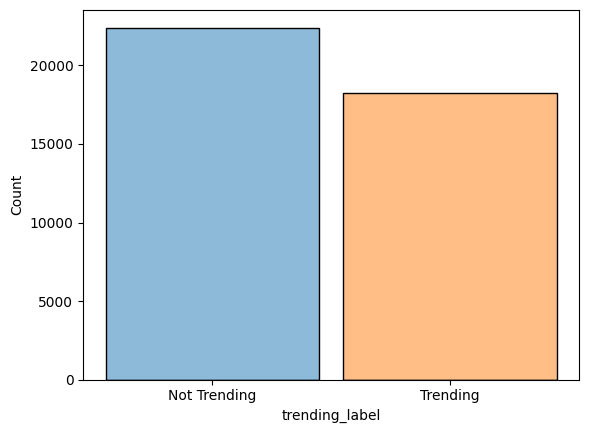

In [1465]:
# Perbandingan Jumlah Video trending dan tidak trending di Youtube US
sns.histplot(data=youtube_US, x='trending_label', hue='trending_label', legend=None, shrink=0.9)

##### **Jumlah views, likes, dislikes, komentar, jumlah tag**

Mari kita uji normalitas ke-5 variabel berikut terlebih dahulu, untuk mengetahui apakah persebaran data terdistribusi normal / tidak, sehingga memudahkan kita untuk menentukan pengambilan metode selanjutnya. Uji normalitas yang digunakan adalah D'agustino & Pearson karena hasil pengujiannya lebih akurat dibandingkan shapiro wilk jika jumlah datanya >5000.

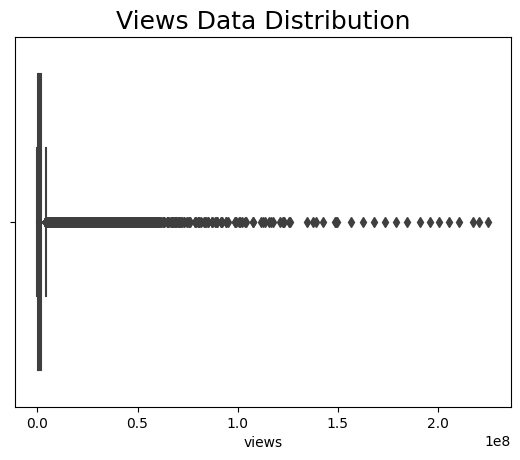

In [1498]:
sns.boxplot(data = youtube_US, x = 'views')
plt.title('Views Data Distribution',size=18)
plt.show()

In [1466]:
from scipy.stats import normaltest

# VIEWS
df_statistics, dp_pvalue = normaltest(youtube_US['views'])
if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}, distribution normal')
else:
    print(f'P-value: {dp_pvalue}, distribution not normal')

P-value: 0.0, distribution not normal


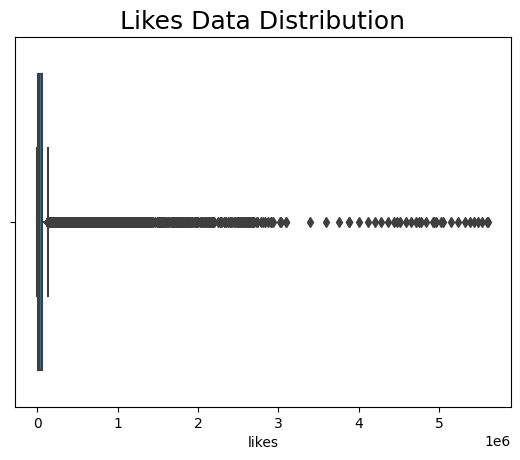

In [1499]:
sns.boxplot(data = youtube_US, x = 'likes')
plt.title('Likes Data Distribution',size=18)
plt.show()

In [1467]:
# LIKES
df_statistics, dp_pvalue = normaltest(youtube_US['likes'])
if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}, distribution normal')
else:
    print(f'P-value: {dp_pvalue}, distribution not normal')

P-value: 0.0, distribution not normal


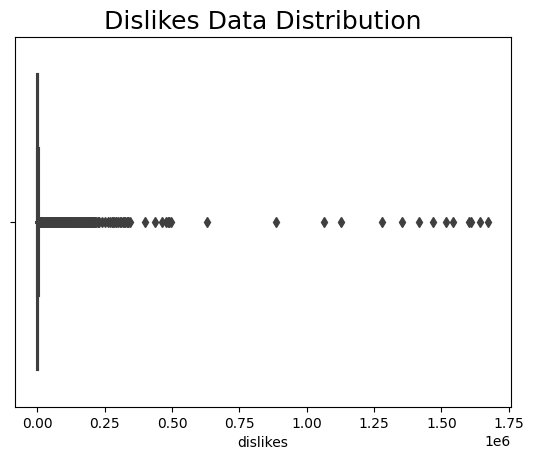

In [1500]:
sns.boxplot(data = youtube_US, x = 'dislikes')
plt.title('Dislikes Data Distribution',size=18)
plt.show()

In [1468]:
# DISLIKES
df_statistics, dp_pvalue = normaltest(youtube_US['dislikes'])
if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}, distribution normal')
else:
    print(f'P-value: {dp_pvalue}, distribution not normal')

P-value: 0.0, distribution not normal


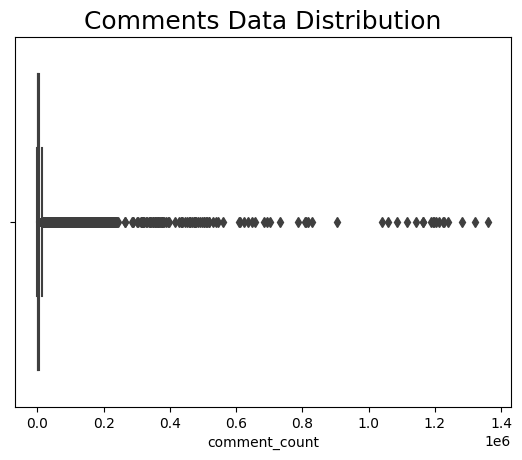

In [1501]:
sns.boxplot(data = youtube_US, x = 'comment_count')
plt.title('Comments Data Distribution',size=18)
plt.show()

In [1469]:
# COMMENT
df_statistics, dp_pvalue = normaltest(youtube_US['comment_count'])
if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}, distribution normal')
else:
    print(f'P-value: {dp_pvalue}, distribution not normal')

P-value: 0.0, distribution not normal


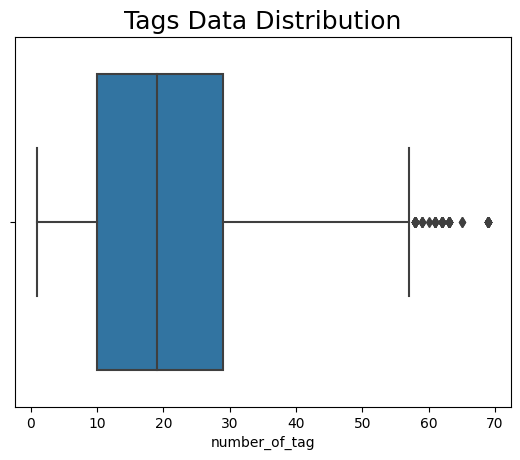

In [1502]:
sns.boxplot(data = youtube_US, x = 'number_of_tag')
plt.title('Tags Data Distribution',size=18)
plt.show()

In [1470]:
# JUMLAH TAG
df_statistics, dp_pvalue = normaltest(youtube_US['number_of_tag'])
if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}, distribution normal')
else:
    print(f'P-value: {dp_pvalue}, distribution not normal')

P-value: 2.7090248065613e-311, distribution not normal


Seluruh data pada variabel tidak terdistribusi normal / memiliki banyak outlier, maka sebaiknya kita gunakan median untuk melihat pada nilai berapa data pada tiap variabel terpusat.

In [1472]:
youtube_US.groupby('trending_label')[['views','likes','dislikes','comment_count','number_of_tag']].median()

,views,likes,dislikes,comment_count,number_of_tag
trending_label,,,,,
Not Trending,422979.0,12614.0,409.0,1297.0,19.0
Trending,1229391.0,29286.0,1140.0,2997.0,19.0


Terdapat perbedaan yang jelas antara jumlah views, likes, comments, dan dislikes pada video yang trending dan tidak trending, dimana video yang trending memiliki interaksi antara penonton dan content creator yang lebih banyak dibandingkan dengan video yang tidak trending. Namun tidak pada kolom jumlah tag. Setelah dicek menggunakan mean, rupanya memang sangat sedikit perbedaannya. Oleh karena itu, kolom number_of_tag dianggap tidak berkorelasi dengan trending. Dibandingkan dengan mencantumkan tags dalam jumlah banyak, mungkin mencantumkan tags sesuai dengan content video dan tags yang popular akan lebih berpengaruh terhadap trending.

In [1473]:
youtube_US.groupby('trending_label')[['number_of_tag']].mean().round()

,number_of_tag
trending_label,
Not Trending,20.0
Trending,19.0


Sebelum mengambil kesimpulan dari views, likes, dislikes dan comments, mari kita uji korelasi terhadap trending terlebih dahulu. Metode korelasi yang digunakan adalah metode spearman karena data tidak terdistribusi normal.

In [1474]:
# Convert trending_label to integer (Trending = 1 & Not Trending = 0) 
youtube_US['trending_code'] = youtube_US['trending_label'].map({'Trending': 1, 'Not Trending': 0})
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,publish,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views,temperature_video,trending_label,trending_code
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,2017-11-13 17:13:01,2017-11-13,Monday,17,1,People & Blogs,2449950,24.0,Not Trending,0
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,2017-04-21 06:47:32,2017-04-21,Friday,6,4,People & Blogs,116099,4968.0,Not Trending,0


In [1483]:
# Correlation Test - Spearman
corr_interaction = youtube_US[['trending_code','views', 'likes', 'dislikes', 'comment_count']].corr('spearman')[['trending_code']]
corr_interaction

,trending_code
trending_code,1.000000
views,0.349939
likes,0.240212
dislikes,0.293892
comment_count,0.240226


<AxesSubplot: >

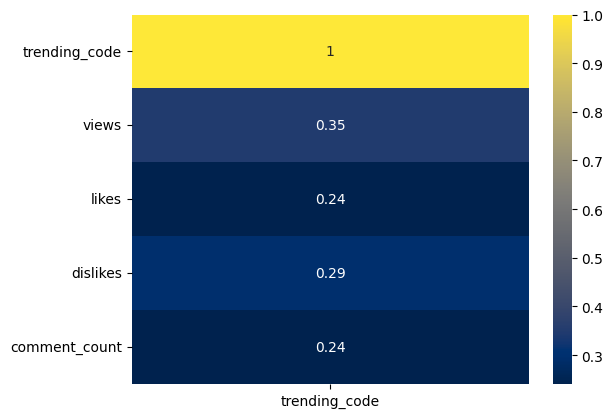

In [1523]:
# Visualisasi Korelasi Views, Likes, Dislikes dan Comment
sns.heatmap(corr_interaction, annot = True, cmap='cividis')

Visualisasi Heatmap diatas menunjukkan bahwa semakin banyak jumlah views, likes, dislikes dan komentar di suatu video akan semakin mendukung video tersebut untuk masuk ke laman trending. Variabel yang paling berpengaruh terhadap trendingnya suatu video adalah views (dengan nilai korelasi 0.349939) lalu diikuti oleh dislikes (0.293892), comments (0.240226), dan likes (0.240212). Hal ini wajar saja terjadi sebab fenomena di dunia nyata menunjukkan video controversial memang menarik banyak orang untuk menonton sehingga lebih mudah untuk mendapatkan views, dislikes dan komentar. Meski begitu, nilai korelasi ini tergolong rendah

Meski begitu bukan berarti bagi kita untuk memulai sebuah channel dengan konten berisi kontroversi, sebab youtube telah memiliki pedoman upload video bagi para content creator. Apabila hal tersebut tak dipatuhi Youtube dapat dengan mudah meremoved video yang kita upload / bahkan melakukan banned pada channel kita. Lebih baik untuk fokus pada konten yang disukai dan menginspirasi banyak orang sehingga channel dapat bertahan lama.

Kembali pada tabel median, sebagian besar video dapat trending ketika videonya mencapai 1.229.391 views / 29.286 likes / 2.997 komentar / 1140 dislikes. Terlihat bahwa jumlah dislikes paling kecil. Mungkin hal ini juga yang menyebabkan konten-konten kontroversial cepat trending.

### **Korelasi antara seluruh variabel**

In [1508]:
# Convert comment_disabled to integer (False = 1 & True = 0) 
youtube_US['cd_code'] = youtube_US['comments_disabled'].map({False: 1, True: 0})
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,publish_date,publish_day,publish_hour,number_of_tag,category,avg_channel_views,temperature_video,trending_label,trending_code,cd_code
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,2017-11-13,Monday,17,1,People & Blogs,2449950,24.0,Not Trending,0,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,2017-04-21,Friday,6,4,People & Blogs,116099,4968.0,Not Trending,0,1


In [1510]:
# Convert rating_disabled to integer (False = 1 & True = 0) 
youtube_US['r_code'] = youtube_US['ratings_disabled'].map({False: 1, True: 0})
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,publish_day,publish_hour,number_of_tag,category,avg_channel_views,temperature_video,trending_label,trending_code,cd_code,r_code
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,Monday,17,1,People & Blogs,2449950,24.0,Not Trending,0,1,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,Friday,6,4,People & Blogs,116099,4968.0,Not Trending,0,1,1


In [1511]:
# Convert video_error_or_removed to integer (False = 1 & True = 0) 
youtube_US['er_code'] = youtube_US['video_error_or_removed'].map({False: 1, True: 0})
youtube_US.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,publish_hour,number_of_tag,category,avg_channel_views,temperature_video,trending_label,trending_code,cd_code,r_code,er_code
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,17,1,People & Blogs,2449950,24.0,Not Trending,0,1,1,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,6,4,People & Blogs,116099,4968.0,Not Trending,0,1,1,1


In [1513]:
corr_all = youtube_US[['trending_code','views', 'likes', 'dislikes', 'comment_count', 'number_of_tag','publish_hour','cd_code','r_code','er_code']].corr(method='spearman')
corr_all

,trending_code,views,likes,dislikes,comment_count,number_of_tag,publish_hour,cd_code,r_code,er_code
trending_code,1.000000,0.349939,0.240212,0.293892,0.240226,-0.022579,-0.025172,-0.023518,-0.023002,0.009629
views,0.349939,1.000000,0.860167,0.851547,0.804631,0.075649,-0.014692,0.007468,0.016052,-0.004486
likes,0.240212,0.860167,1.000000,0.795232,0.876514,0.051122,0.058483,0.078942,0.109116,-0.005598
dislikes,0.293892,0.851547,0.795232,1.000000,0.835777,0.063739,0.027184,0.030336,0.108760,-0.004073
comment_count,0.240226,0.804631,0.876514,0.835777,1.000000,0.067353,0.067623,0.211978,0.085672,0.002823
number_of_tag,-0.022579,0.075649,0.051122,0.063739,0.067353,1.000000,0.055704,0.054267,0.045791,0.020457
publish_hour,-0.025172,-0.014692,0.058483,0.027184,0.067623,0.055704,1.000000,0.000290,-0.016884,-0.000856
cd_code,-0.023518,0.007468,0.078942,0.030336,0.211978,0.054267,0.000290,1.000000,0.313656,-0.002832
r_code,-0.023002,0.016052,0.109116,0.108760,0.085672,0.045791,-0.016884,0.313656,1.000000,-0.001438
er_code,0.009629,-0.004486,-0.005598,-0.004073,0.002823,0.020457,-0.000856,-0.002832,-0.001438,1.000000


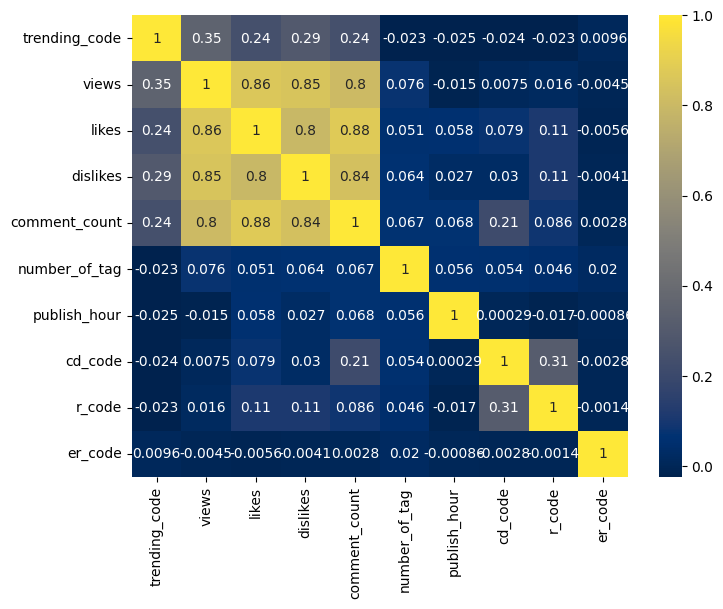

In [1524]:
# Visualisasi Korelasi antar variabel
plt.figure(figsize=(8,6))
sns.heatmap(corr_all,annot = True,cmap='cividis')
plt.show()

Informasi berdasarkan visualisasi korelasi antar variabel :
- Diantara seluruh variabel, views, likes, comment, dan dislikes adalah yang paling mempengaruhi video untuk trending
- Korelasi antara views dengan likes (0.86), comment (0.80), dislikes (0.85) tergolong besar. Hal ini berarti semakin banyak views akan mempengaruhi kenaikan jumlah likes, comments, dan dislikes.
- Menonaktifkan komentar memiliki nilai korelasi yang berlawanan dengan trending_code, yang berarti menonaktifkan komentar dapat mengurangi peluang video untuk dapat trending. Meski tingkat korelasinya masih tergolong sangat rendah yaitu -0.024.

### **Average Views, likes, Comment & Dislikes berdasarkan Kategori**

In [1756]:
cat_views = youtube_US.groupby(['category'])[['views','comment_count','likes','dislikes']].median().sort_values(['views'], ascending=False)
cat_views

,views,comment_count,likes,dislikes
category,,,,
Gaming,1499849.0,8915.5,51239.0,1991.0
Music,1446531.0,3938.0,62756.0,1252.0
Film & Animation,1289307.0,2642.0,25203.0,1032.0
Shows,1155692.0,1648.0,21537.0,465.0
Comedy,981966.5,2615.0,30265.5,956.5
Entertainment,738199.0,1712.0,16347.0,631.0
People & Blogs,610075.0,1701.0,19657.0,577.0
Science & Technology,602234.0,1785.5,16870.0,603.0
Sports,569870.0,1138.0,5856.0,355.0


In [1757]:
cat_views = cat_views.reset_index()

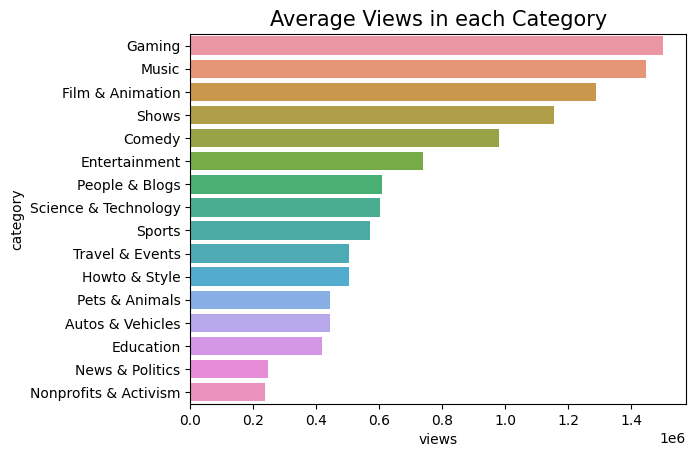

In [1758]:
sns.barplot(data=cat_views, x='views', y='category')
plt.title('Average Views in each Category', size=15)
plt.show()

In [1760]:
cat_likes = youtube_US.groupby(['category'])[['likes']].median().sort_values(['likes'], ascending=False)
cat_likes

,likes
category,
Music,62756.0
Gaming,51239.0
Comedy,30265.5
Film & Animation,25203.0
Howto & Style,21563.5
Shows,21537.0
People & Blogs,19657.0
Science & Technology,16870.0
Entertainment,16347.0


In [1761]:
cat_likes = cat_likes.reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


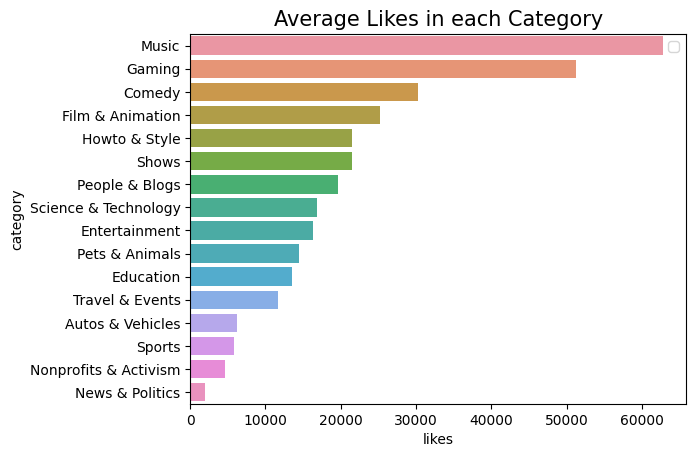

In [1762]:
sns.barplot(data=cat_likes, x='likes', y='category')
plt.title('Average Likes in each Category', size=15)
plt.legend(loc=0)
plt.show()

Berdasarkan hasil visualisasi, category yang paling banyak ditonton oleh penonton di US adalah Gaming, Music, film & animation, shows dan comedy. Sedangkan konten yang paling banyak disukai adalah music, Gaming, comedy, Film animation dan howto & style. Hal ini menunjukkan bahwa sebagian besar penonton di US menggunakan Youtube sebagai sarana healing, hiburan dan mencari inspirasi. konten music memiliki rata2 likes lebih tinggi dibandingkan gamin walaupun gamin paling banyak ditonton. hal ini mungkin terjadi karena sebagian besar konten music diproduksi oleh agency hiburan, artis, dan pemusik sehingga memiliki kualitas video yang baik dan juga memiliki banyak penggemar dari seluruh negara.

Mari kita cek ke-6 kategori terfavorit diatas menurut penonton US :

In [1775]:
# Music
youtube_US[youtube_US['category']=='Music'][['channel_title']].head(10)

,channel_title
26002,marshmello
26003,EminemVEVO
26004,Hunter Hayes
26005,Nickelback
26006,U2VEVO
26007,MatthewSantoro
26008,JenniferLopezVEVO
26009,GEazyMusicVEVO
26010,Ed Sheeran
26011,fosterthepeopleVEVO


In [1766]:
# Comedy
youtube_US[youtube_US['category']=='Comedy'][['channel_title']].head(5)

,channel_title
13152,Rudy Mancuso
13153,Cracked
13154,Gus Johnson
13155,Niki and Gabi
13156,Lele Pons


In [1769]:
# Film & Animation
youtube_US[youtube_US['category']=='Film & Animation'][['channel_title']].head(5)

,channel_title
19002,20th Century Fox
19003,FaeryInLoveInc
19004,Screen Junkies
19005,Sara Dietschy
19006,Zero Media


In [1767]:
# Gaming
youtube_US[youtube_US['category']=='Gaming'][['channel_title']].head(5)

,channel_title
39971,Nintendo
39972,Nintendo
39973,iHasCupquake
39974,iHasCupquake
39975,Butch Hartman


In [1773]:
# Shows
youtube_US[youtube_US['category']=='Shows'][['channel_title']].head(1)

,channel_title
40844,CNET


In [1770]:
# Style
youtube_US[youtube_US['category']=='Howto & Style'][['channel_title']].head(5)

,channel_title
35044,Refinery29
35045,JerryRigEverything
35046,dope2111
35047,John Lewis
35048,Amber Scholl


### **Top 5 Favorite Category in US**

**Most Views**

In [1753]:
top5_views = youtube_US.groupby(['category'])[['views']].median().sort_values(['views'], ascending=False).head(5)
top5_views

,views
category,
Gaming,1499849.0
Music,1446531.0
Film & Animation,1289307.0
Shows,1155692.0
Comedy,981966.5


In [1754]:
top5_views = top5_views.reset_index()

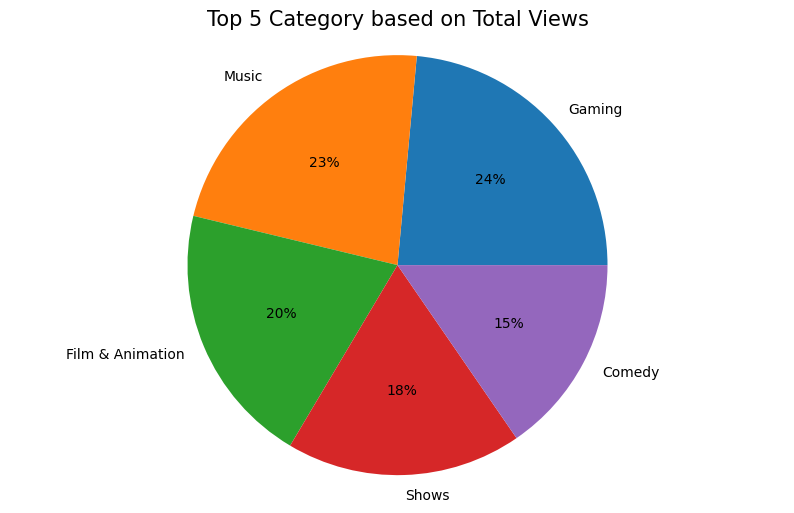

In [1755]:
# TOP 5 CATEGORY BASED ON VIEWS
plt.figure(figsize=(10,6))
plt.pie(top5_views['views'], labels= top5_views['category'], autopct='%1.f%%')
plt.title('Top 5 Category based on Total Views', size=15)
plt.axis('equal')

plt.show()

**Most Likes**

In [1747]:
top5_likes = youtube_US.groupby(['category'])[['likes']].median().sort_values(['likes'], ascending=False).head(5)
top5_likes 

,likes
category,
Music,62756.0
Gaming,51239.0
Comedy,30265.5
Film & Animation,25203.0
Howto & Style,21563.5


In [1748]:
top5_likes = top5_likes.reset_index()

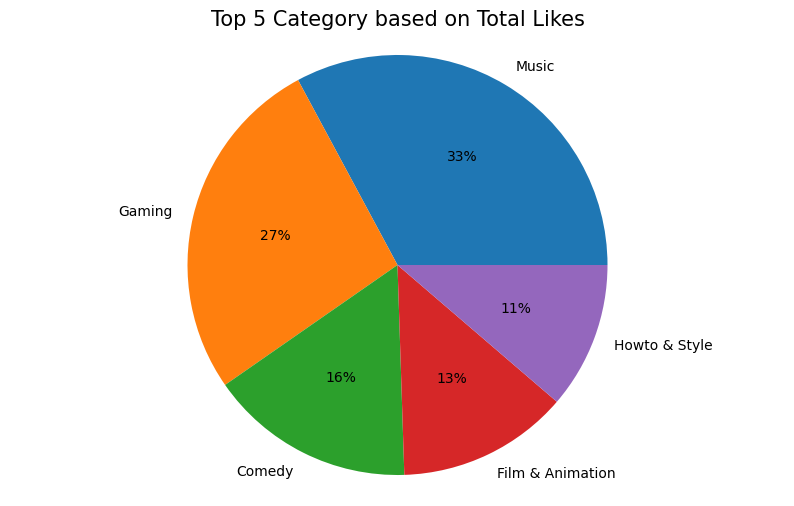

In [1749]:
# TOP 5 CATEGORY BASED ON LIKES
plt.figure(figsize=(10,6))
plt.pie(top5_likes['likes'], labels= top5_likes['category'], autopct='%1.f%%')
plt.title('Top 5 Category based on Total Likes', size=15)
plt.axis('equal')

plt.show()

**Most Comments**

In [1744]:
top5_comments = youtube_US.groupby(['category'])[['comment_count']].median().sort_values(['comment_count'], ascending=False).head(5)
top5_comments

,comment_count
category,
Gaming,8915.5
Music,3938.0
Film & Animation,2642.0
Comedy,2615.0
Howto & Style,1845.0


In [1745]:
top5_comments = top5_comments.reset_index()

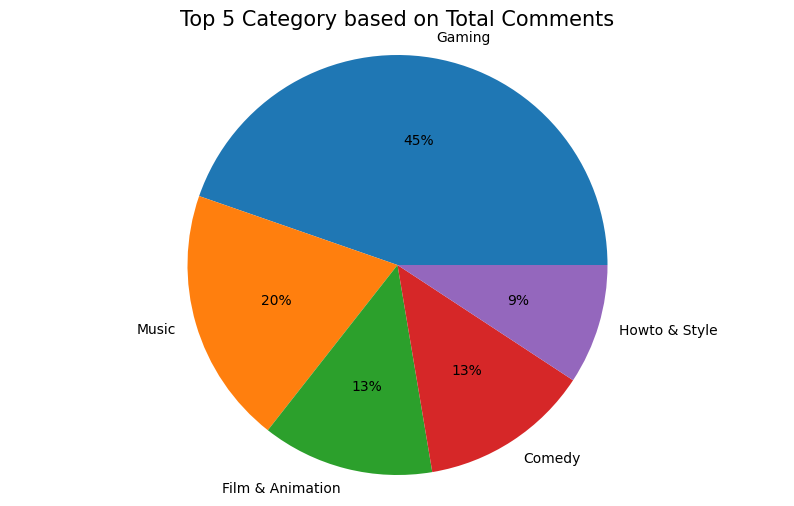

In [1746]:
# TOP 5 CATEGORY BASED ON COMMENT
plt.figure(figsize=(10,6))
plt.pie(top5_comments['comment_count'], labels= top5_comments['category'], autopct='%1.f%%')
plt.title('Top 5 Category based on Total Comments', size=15)
plt.axis('equal')

plt.show()

**Most Dislikes**

In [1776]:
top5_dislikes = youtube_US.groupby(['category'])[['dislikes']].median().sort_values(['dislikes'], ascending=False).head(5)
top5_dislikes 

,dislikes
category,
Gaming,1991.0
Music,1252.0
Film & Animation,1032.0
Comedy,956.5
Entertainment,631.0


In [1777]:
top5_dislikes = top5_dislikes.reset_index()

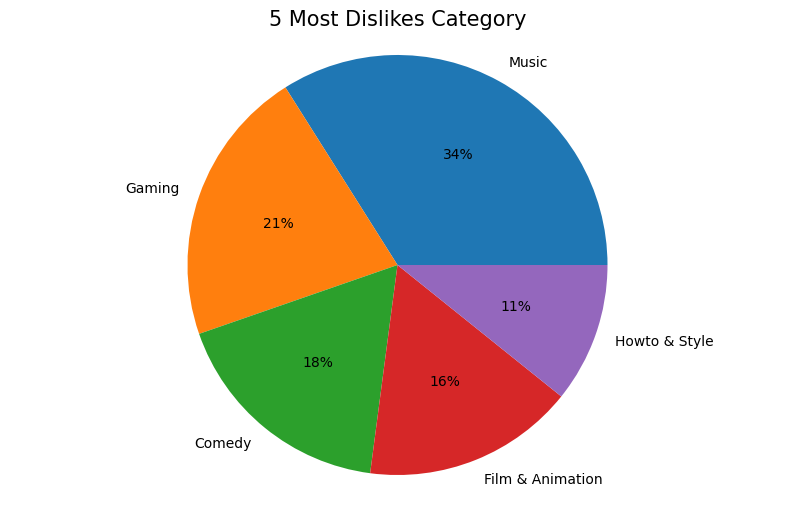

In [1778]:
# 5 MOST DISLIKES CATEGORY 
plt.figure(figsize=(10,6))
plt.pie(top5_dislikes['dislikes'], labels= top5_likes['category'], autopct='%1.f%%')
plt.title('5 Most Dislikes Category', size=15)
plt.axis('equal')

plt.show()

Dapat terlihat bahwa konten yang memiliki banyak views juga memili jumlah likes dan dislikes yang banyak. Meski begitu, perbandingan jumlah likes dan jumlah dislikes terpantau besar, sehingga dapat dikatakan : meskipun banyak orang yang mendislikes, ke5 konten diatas masih menjadi konten terfavorit bagi penonton US.

### **10 Channel with Most Views and likes**

**Views**

In [1740]:
top10_cv = youtube_US.groupby(['channel_title'])[['views']].median().sort_values(['views'], ascending=False).head(10)
top10_cv 

,views
channel_title,
ChildishGambinoVEVO,162556776.0
BeckyGVEVO,56755211.5
LuisFonsiVEVO,51960876.0
Kylie Jenner,49939440.5
MalumaVEVO,49195484.0
DrakeVEVO,41168952.5
FoxStarHindi,39299983.5
TheWeekndVEVO,36488080.0
Daddy Yankee,32082218.0


**Likes**

In [1739]:
top10_cl = youtube_US.groupby(['channel_title'])[['likes']].median().sort_values(['likes'], ascending=False).head(10)
top10_cl 

,likes
channel_title,
ChildishGambinoVEVO,4202645.0
ibighit,2086731.5
David Dobrik,1967904.0
LuisFonsiVEVO,1834122.5
Logan Paul Vlogs,1211898.5
Desimpedidos,1042192.0
BeckyGVEVO,1009336.5
Ed Sheeran,933938.0
TheWeekndVEVO,903331.0


Sebagian besar channel yang memiliki jumlah views dan likes terbanyak merupakan channel music

### **10 Channel with Most Dislikes**

**Dislikes**

In [1734]:
top10_cd = youtube_US.groupby(['channel_title'])[['dislikes']].median().sort_values(['dislikes'], ascending=False).head(10)
top10_cd 

,dislikes
channel_title,
Logan Paul Vlogs,416773.5
ChildishGambinoVEVO,269530.0
Daily Caller,224152.0
Call of Duty,194249.0
YouTube Spotlight,126705.5
KatyPerryVEVO,120038.5
shakiraVEVO,109188.0
Erika Costell,99056.0
David Dobrik,96814.0


In [1780]:
youtube_US[youtube_US['channel_title']=='Logan Paul Vlogs'][['category']].head(1)

,category
4553,Entertainment


Channel yang memiliki paling banyak jumlah dislikes adalah channel Logan Paul Vlogs dan konten tersebut mengupload kategori jenis entertainment.

### **Rata-rata waktu yang dibutuhkan video untuk Trending**

In [1789]:
print('Rata-rata waktu yang dibutuhkan video untuk Trending',youtube_US[youtube_US['trending_label']=='Trending'][['title','temperature_video']].mean()[0], 'jam')

Rata-rata waktu yang dibutuhkan video untuk Trending 421.1412596612399 jam


C:\Users\USER\AppData\Local\Temp\ipykernel_15604\1826304762.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Rata-rata waktu yang dibutuhkan video untuk Trending',youtube_US[youtube_US['trending_label']=='Trending'][['title','temperature_video']].mean()[0], 'jam')


In [1793]:
print('atau sama dengan', 421/60, 'hari')

atau sama dengan 7.016666666666667 hari


### **Waktu terbaik upload video agar Trending**

In [1795]:
youtube_US[youtube_US['trending_label']=='Trending'][['publish_hour','publish_day']].mode()

,publish_hour,publish_day
0,15,Friday


Sebagian besar video yang trending rupanya mengupload videonya pada hari jumat atau pukul 15.00 sore. hal ini mungkin terjadi karena hari jumat adalah hari terakhir kerja sebalum berlibur bagi sebagian besar orang, serta pukul 15 adalah waktu ketika orang-orang sudah selesai berkegiatan.

## **Conclusion**

- Top 5 kategori yang paling diminati di US : Music, Shows, Gaming, Film & Animation dan Comedy
- Sebagian besar top 10 Channel terpopuler di US merupakan channel music seperti : ChildishGambinoVEVO, BeckyGVEVO, MalumaVEVO, DrakeVEVO, iBighit dsb. 
- Semakin banyak jumlah jumlah views, comment, likes dan dislikes, akan semakin mempengaruhi video untuk trending. Faktor yang paling berpengaruh terhadap trending adalah views selanjutnya dislikes, comment dan likes secara berurutan.
- Semakin banyak views akan semakin mempengaruhi banyaknya comment, likes dan dislikes pada suatu video.
- Rata2 views, comment, likes dan dislikes yang dibutuhkan agar video bisa trending adalah sebagai berikut :
    - views : 1.229.391 penayangan
    - likes : 29.286 likes
    - comment : 2.997 komentar
    - dislikes :1.140 dislikes
- Mencantumkan description, Menonaktifkan komentar, dan Menonaktifkan rating pada video/ tidak, tidak mempengaruhi video untuk trending secara signifikan
- Agar video cepat trending, sebaiknya diupload pada :
    - Hari : Jumat
    - Jam : 15.00
- Rata2 waktu yang dibutuhkan oleh video untuk trending : 421 jam tau 7 hari

## **Action Recommendation**

- Sebelum membuka channel, Client dapat menentukan brand image dan niche channel terlebih dahulu. Beberapa niche yang dapat dipilih adalah konten music, comedy, gaming, styling, show dan Film & Animation. Sementara itu, beberapa Brand image yang disukai oleh banyak pengguna youtube di US dapat dipelajari dengan menonton konten-konten yang diupload oleh beberapa channel popular diatas. Anda juga bisa mengambil inspirasi dari konten-konten yang sedang popular/fresh.
- Sebaiknya tidak memulai channel dengan konten autos & vehicle, education, non profit & activism. Kecuali jika client memiliki passion di bidang tersebut.
- Sebaiknya client tidak membuat konten clickbait / sensasi / pornografi / harmful karena akan mempengaruhi video untuk diremoved dan meningkatkan dislikes. Jika komten seperti ini terus diupload, youtube dapat melakukan banned pada channel client.
- Perhatikan waktu upload video. Waktu upload terbaik adalah pada hari jumat dan jam 15.00
- Dibandingkan mencantumkan tags dalam jumlah banyak, akan lebih baik jika mencantumkan tags yang sesuai dengan jenis konten dan beberapa tags general yang popular.
- Tingkatkan interaksi dengan penonton dengan mengaktifkan kolom komentar, membalas komentar dan aktif mengupload video.
- Menyediakan thumbnail yang menarik, youtube telah memberikan acuan pembuatan thumbnail yang baik. 
- Mengupload video secara konsisten. Dengan mengupload video secara berkala akan memudahkan channel lebih dikenal oleh banyak pengguna youtube lain, dan akan mempengaruhi kenaikan jumlah subscriber maupun views.
- Client dapat memanfaatkan youtube Ads untuk mempromosikan channel dan video dengan cepat.
- Jika sudah ada video yang masuk ke laman trending, usahakan untuk mengupload beberapa video lainnya untuk semakin membuat penonton penasaran dan tertarik dengan channel client
- Ketika sudah mengupload beberapa video, pahami karakter penonton anda tentang apa yang disukai dan tidak disukainya serta kembangkan video berdasarkan saran dari penonton. Penting bagi content creator untuk memperhatikan perkembangan jumlah views, likes, dislikes, serta reaksi penonton pada kolom komentar untuk mengetahui apakah konten yang dibuat disukai atau tidak.